# 1. Librerías necesarias

In [2]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Using TensorFlow backend.


# 2. Creación del DataSet

### 2.1. DataSet Sujetos con Alzheimer

In [3]:
#identificador
id_sujeto = np.random.randint(1,580, size=(580))
df = pd.DataFrame(id_sujeto, columns=['id_sujeto'])

#genero
genero = ["Masculino","Femenino"]
df["genero"] = np.random.choice(genero, 580, p=[0.34, 0.66])

#edad
edad = ["50-64","65-69","70-74", "75-79","80-84",">85"]
df["intervalo_edad"] = np.random.choice(edad, 580, p=[0.03, 0.04,0.08,0.17,0.34,0.34])

def conditional_categories_edad(row):
    if row['intervalo_edad'] == "50-64" :
        return np.random.randint(50,64)
    if row['intervalo_edad'] == "65-69":
        return np.random.randint(65,69)
    if row['intervalo_edad'] == "70-74":
        return np.random.randint(70,74)
    if row['intervalo_edad'] == "75-79":
        return np.random.randint(75,79)
    if row['intervalo_edad'] == "80-84":
        return np.random.randint(80,84)
    if row['intervalo_edad'] == ">85" :
        return np.random.randint(85,100)
df['edad']=df.apply(conditional_categories_edad, axis=1)

#estado civil
estado_civil = ["soltero","casado","divorciado", "viudo"]
df["estado_civil"] = np.random.choice(estado_civil, 580, p=[0.3072, 0.2165,0.2165,0.2598])

#numero_descendencia
numero_descendientes = ["0","1","2","3","4","5",">5"]
df["numero_descendientes"] = np.random.choice(numero_descendientes, 580, p=[0.178, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137 ])

#actividad fisica 
actividad_fisica = ["sedentaria","ligera","moderada", "intensa","muy intensa"]
df["actividad_fisica"] = np.random.choice(actividad_fisica, 580, p=[0.284, 0.179, 0.179, 0.179, 0.179])

#calidad del sueño
calidad_sueño = ["trastornos_sueño","baja","media","buena"]
df["calidad_sueño"] = np.random.choice(calidad_sueño, 580, p=[0.276, 0.3767, 0.2, 0.1473])

#calidad de la dieta
calidad_dieta = ["mind0-7","mind7-9","mind9-15"]
df["calidad_dieta"] = np.random.choice(calidad_dieta, 580, p=[0.4717, 0.3066, 0.2217])

#fumador
fumador = ["no_fumador", "fumador_pasivo", "fumador_ocasional", "fumador_medio", "fumador_activo", "fumador_empedernido"]
df["fumador"] = np.random.choice(fumador, 580, p=[0.157, 0.159, 0.16, 0.1656, 0.176, 0.1824])

#bebedor
bebedor = ["abstemio","bebedor_moderado","bebedor_riesgo"]
df["bebedor"] = np.random.choice(bebedor, 580, p=[0.339, 0.322, 0.339])

#niveles_depresión
niveles_depresión = ["no_depresion","depresion_leve","depresion_moderada","depresion_grave"]
df["niveles_depresión"] = np.random.choice(niveles_depresión, 580, p=[0.194, 0.256, 0.271, 0.279])

#niveles_ansiedad
niveles_ansiedad = ["no_ansiedad","ansiedad_leve","ansiedad_moderada","ansiedad_alta"]
df["niveles_ansiedad"] = np.random.choice(niveles_ansiedad, 580, p=[0.194, 0.256, 0.271, 0.279])

#niveles_estres
niveles_estres = ["estres_bajo", "estres_medio", "estres_alto"]
df["niveles_estres"] = np.random.choice(niveles_estres, 580, p=[0.274, 0.3425, 0.3835])

#actividad_mental_ultimos_años
actividad_mental_ultimos_años = ["Si","No"]
df["actividad_mental_ultimos_años"] = np.random.choice(actividad_mental_ultimos_años, 580, p=[0.3939,0.6061])

#actividad_fisica_ultimos_años
df["actividad_fisica_ultimos_años"] = np.random.choice(actividad_fisica, 580, p=[0.284, 0.179, 0.179, 0.179, 0.179])

#numero_idiomas
numero_idiomas = ["1","2",">=3"]
df["numero_idiomas"] = np.random.choice(numero_idiomas, 580, p=[0.371, 0.3145, 0.3145])

#niveles_vitamina_b12
niveles_vitamina_b12 = ["bajos","normales","altos"]
df["niveles_vitamina_b12"] = np.random.choice(niveles_vitamina_b12, 580, p=[0.3449, 0.3103, 0.3448])

#antecedentes_familiares_1Grado
antecedentes_familiares_1Grado = ["Si","No"]
df["antecedentes_familiares_1Grado"] = np.random.choice(antecedentes_familiares_1Grado, 580, p=[0.5652,0.4348])

#antecedentes_familiares_2Grado
antecedentes_familiares_2Grado = ["Si","No"]
df["antecedentes_familiares_2Grado"] = np.random.choice(antecedentes_familiares_2Grado, 580, p=[0.508,0.492])

#antecedentes_familiares_3Grado
antecedentes_familiares_3Grado = ["Si","No"]
df["antecedentes_familiares_3Grado"] = np.random.choice(antecedentes_familiares_3Grado, 580, p=[0.505,0.495])

#genetica
genetica = ["Si","No"]
df["genetica"] = np.random.choice(genetica, 580, p=[0.01,0.99])

#deportes_realizados
deportes_realizados = ["deportes_equipo","deportes_individuales","deportes_fuerza","deportes_extremos","deportes_contacto"]
df["deportes_realizados"] = np.random.choice(deportes_realizados, 580, p=[0.217, 0.174, 0.174, 0.2175, 0.2175])

#cardiopatias
cardiopatias = ["Si","No"]
df["cardiopatias"] = np.random.choice(cardiopatias, 580, p=[0.5964,0.4036])

#diabetes
diabetes = ["Si","No"]
df["diabetes"] = np.random.choice(diabetes, 580, p=[0.622,0.378])

#hipertension
hipertension = ["Si","No"]
df["hipertension"] = np.random.choice(hipertension, 580, p=[0.543,0.457])

#colesterol
colesterol = ["Adecuado","No_Adecuado"]
df["colesterol"] = np.random.choice(colesterol, 580, p=[0.4152,0.5848])

#actividad_creativa
actividad_creativa = ["pintura", "escritura", "musica", "escultura", "otras", "ninguna"]
df["actividad_creativa"] = np.random.choice(actividad_creativa, 580, p=[0.1636, 0.1636,0.1636,0.1636,0.1636,0.182])

#mano_dominante
mano_dominante = ["diestro","zurdo","ambidiestro"]
df["mano_dominante"] = np.random.choice(mano_dominante, 580, p=[0.88, 0.11, 0.01])

#edad_jubilacon
def conditional_categories_edad_jubilacion(row):
    if row['intervalo_edad'] == "50-64" :
        return np.random.randint(50,64)
    if row['intervalo_edad'] == "65-69":
        return np.random.randint(65,69)
    if row['intervalo_edad'] == "70-74":
        return np.random.randint(70,74)
    if row['intervalo_edad'] == "75-79":
        return np.random.randint(75,79)
    if row['intervalo_edad'] == "80-84":
        return np.random.randint(80,84)
    if row['intervalo_edad'] == ">85" :
        return np.random.randint(85,100)
df['edad_jubilacion']=df.apply(conditional_categories_edad_jubilacion, axis=1)


#socialmente_activo
socialmente_activo = ["Si","No"]
df["socialmente_activo"] = np.random.choice(socialmente_activo, 580, p=[0.468, 0.532])

#soledad
soledad = ["Si","No"]
df["soledad"] = np.random.choice(soledad, 580, p=[0.666, 0.334])

#nacionalidad
nacionalidad = ["Espana","Polonia","Rumania","Venezuela","Colombia","Ecuador","Inglaterra","China","Japon","Francia"]
df["nacionalidad"] = np.random.choice(nacionalidad, 580, p=[0.114 ,0.071 ,0.071 ,0.114 ,0.12 ,0.119 ,0.071 ,0.05 ,0.17 ,0.10 ])

#continente
def conditional_categories_continente(row):
    if row['nacionalidad'] == "Espana" :
        return 'Europa'
    if row['nacionalidad'] == "Polonia":
        return 'Europa'
    if row['nacionalidad'] == "Rumania" :
        return 'Europa'
    if row['nacionalidad'] == "Venezuela" :
        return 'America del sur'
    if row['nacionalidad'] == "Colombia" :
        return 'America del sur'
    if row['nacionalidad'] == "Ecuador" :
        return 'America del sur'
    if row['nacionalidad'] == "Inglaterra" :
        return 'Europa'
    if row['nacionalidad'] == "China" :
        return 'Asia'
    if row['nacionalidad'] == "Japon" :
        return 'Asia'
    if row['nacionalidad'] == "Francia" :
        return 'Europa'

df['continente']=df.apply(conditional_categories_continente, axis=1)

#idioma_nativo
idioma_nativo = ["Espanol","Polaco","Rumano","Ingles","Chino","Japones","Frances"]
def conditional_categories_idioma_nativo(row):
    if row['nacionalidad'] == "Espana":
        return np.random.choice(["Español","Polaco","Rumano","Inglés", "Chino"], 
                                p=[0.7, 0.05, 0.15, 0.01, 0.09])
    if row['nacionalidad'] == "Venezuela":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Colombia":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Ecuador":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Inglaterra":
        return np.random.choice(["Español","Polaco","Rumano","Inglés","Chino","Japones",
                "Frances"], p=[0.075, 0.1, 0.05, 0.72, 0.029, 0.001, 0.025])  
    if row['nacionalidad'] == "Polonia":
        return np.random.choice(["Polaco","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "Rumania":
        return np.random.choice(["Rumano","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "China":
        return np.random.choice(["Chino","Español","Inglés", "Japones"], 
                                p=[0.7, 0.1, 0.1, 0.1])
    if row['nacionalidad'] == "Japon":
        return np.random.choice(["Japones","Chino","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "Francia":
        return np.random.choice(["Frances","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    
df['idioma_nativo']=df.apply(conditional_categories_idioma_nativo, axis=1)

#vegetariano
vegetariano = ["Si","No"]
df["vegetariano"] = np.random.choice(hipertension, 580, p=[0.278,0.722])

#vegano
vegano = ["Si","No"]
df["vegano"] = np.random.choice(vegano, 580, p=[0.04,0.96])

#lesiones_cabeza
lesiones_cabeza = ["Si","No"]
df["lesiones_cabeza"] = np.random.choice(lesiones_cabeza, 580, p=[0.663,0.337])

#tipo_adiccion
tipo_adiccion = ["Cocaina", "Marihuana", "Anfetaminas", "Benzodiacepinas", "Ninguna"]
df["tipo_adiccion"] = np.random.choice(tipo_adiccion, 580, p=[0.02142,0.02142, 0.02142, 0.02142, 0.91432])

#sobrepeso
sobrepeso = ["Si","No"]
df["sobrepeso"] = np.random.choice(sobrepeso, 580, p=[0.584,0.416])

#obesidad
obesidad = ["Si","No"]
df["obesidad"] = np.random.choice(obesidad, 580, p=[0.535,0.465])

#nivel_educativo
nivel_educativo = ["bajo","bajo-medio","medio","alto-medio","alto"]
df["nivel_educativo"] = np.random.choice(nivel_educativo, 580, p=[0.2727,0.2363, 0.20, 0.1636, 0.1274])

#empleo_realizado
empleo_realizado = ["mecanico","manual","intelectual","investigacion"]
df["empleo_realizado"] = np.random.choice(empleo_realizado, 580, p=[0.30,0.25, 0.225, 0.225])

#alzheimer
alzheimer = ["Si","No"]
df["alzheimer"] = np.random.choice(alzheimer, 580, p=[0.8, 0.2])

### 2.2. Dataset con sujetos sin Alzheimer

In [4]:
#identificador
id_sujeto = np.random.randint(580,100000, size=(99420))
df_sin = pd.DataFrame(id_sujeto, columns=['id_sujeto'])

#genero
genero = ["Masculino","Femenino"]
df_sin["genero"] = np.random.choice(genero, 99420, p=[0.66, 0.34])

#edad
edad = ["50-64","65-69","70-74", "75-79","80-84",">85"]
df_sin["intervalo_edad"] = np.random.choice(edad, 99420, p=[0.34, 0.34,0.17,0.08,0.04,0.03])

def conditional_categories_edad(row):
    if row['intervalo_edad'] == "50-64" :
        return np.random.randint(50,64)
    if row['intervalo_edad'] == "65-69":
        return np.random.randint(65,69)
    if row['intervalo_edad'] == "70-74":
        return np.random.randint(70,74)
    if row['intervalo_edad'] == "75-79":
        return np.random.randint(75,79)
    if row['intervalo_edad'] == "80-84":
        return np.random.randint(80,84)
    if row['intervalo_edad'] == ">85" :
        return np.random.randint(85,100)
df_sin['edad']=df_sin.apply(conditional_categories_edad, axis=1)

#estado civil
estado_civil = ["soltero","casado","divorciado", "viudo"]
df_sin["estado_civil"] = np.random.choice(estado_civil, 99420, p=[0.2598, 0.2165,0.2165,0.3072])

#numero_descendencia
numero_descendientes = ["0","1","2","3","4","5",">5"]
df_sin["numero_descendientes"] = np.random.choice(numero_descendientes, 99420, p=[0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.178 ])

#actividad fisica 
actividad_fisica = ["sedentaria","ligera","moderada", "intensa","muy intensa"]
df_sin["actividad_fisica"] = np.random.choice(actividad_fisica, 99420, p=[0.179, 0.179, 0.179, 0.179, 0.284])

#calidad del sueño
calidad_sueño = ["trastornos_sueño","baja","media","buena"]
df_sin["calidad_sueño"] = np.random.choice(calidad_sueño, 99420, p=[0.1473, 0.2, 0.3767, 0.276])

#calidad de la dieta
calidad_dieta = ["mind0-7","mind7-9","mind9-15"]
df_sin["calidad_dieta"] = np.random.choice(calidad_dieta, 99420, p=[0.2217, 0.3066, 0.4717])

#fumador
fumador = ["no_fumador", "fumador_pasivo", "fumador_ocasional", "fumador_medio", "fumador_activo", "fumador_empedernido"]
df_sin["fumador"] = np.random.choice(fumador, 99420, p=[0.1824, 0.176, 0.1656, 0.16, 0.159, 0.157])

#bebedor
bebedor = ["abstemio","bebedor_moderado","bebedor_riesgo"]
df_sin["bebedor"] = np.random.choice(bebedor, 99420, p=[0.339, 0.322, 0.339])

#niveles_depresión
niveles_depresión = ["no_depresion","depresion_leve","depresion_moderada","depresion_grave"]
df_sin["niveles_depresión"] = np.random.choice(niveles_depresión, 99420, p=[0.279, 0.271, 0.256, 0.194])

#niveles_ansiedad
niveles_ansiedad = ["no_ansiedad","ansiedad_leve","ansiedad_moderada","ansiedad_alta"]
df_sin["niveles_ansiedad"] = np.random.choice(niveles_ansiedad, 99420, p=[0.279, 0.271, 0.256, 0.194])

#niveles_estres
niveles_estres = ["estres_bajo", "estres_medio", "estres_alto"]
df_sin["niveles_estres"] = np.random.choice(niveles_estres, 99420, p=[0.3835, 0.3425, 0.274])

#actividad_mental_ultimos_años
actividad_mental_ultimos_años = ["Si","No"]
df_sin["actividad_mental_ultimos_años"] = np.random.choice(actividad_mental_ultimos_años, 99420, p=[0.6061,0.3939])

#actividad_fisica_ultimos_años
df_sin["actividad_fisica_ultimos_años"] = np.random.choice(actividad_fisica, 99420, p=[0.179, 0.179, 0.179, 0.179, 0.284])

#numero_idiomas
numero_idiomas = ["1","2",">=3"]
df_sin["numero_idiomas"] = np.random.choice(numero_idiomas, 99420, p=[0.3145, 0.3145, 0.371])

#niveles_vitamina_b12
niveles_vitamina_b12 = ["bajos","normales","altos"]
df_sin["niveles_vitamina_b12"] = np.random.choice(niveles_vitamina_b12, 99420, p=[0.3448, 0.3103, 0.3449])

#antecedentes_familiares_1Grado
antecedentes_familiares_1Grado = ["Si","No"]
df_sin["antecedentes_familiares_1Grado"] = np.random.choice(antecedentes_familiares_1Grado, 99420, p=[0.4348,0.5652])

#antecedentes_familiares_2Grado
antecedentes_familiares_2Grado = ["Si","No"]
df_sin["antecedentes_familiares_2Grado"] = np.random.choice(antecedentes_familiares_2Grado, 99420, p=[0.492,0.508])

#antecedentes_familiares_3Grado
antecedentes_familiares_3Grado = ["Si","No"]
df_sin["antecedentes_familiares_3Grado"] = np.random.choice(antecedentes_familiares_3Grado, 99420, p=[0.495,0.505])

#genetica
genetica = ["Si","No"]
df_sin["genetica"] = np.random.choice(genetica, 99420, p=[0.99,0.01])

#deportes_realizados
deportes_realizados = ["deportes_equipo","deportes_individuales","deportes_fuerza","deportes_extremos","deportes_contacto"]
df_sin["deportes_realizados"] = np.random.choice(deportes_realizados, 99420, p=[0.2175, 0.2175, 0.174, 0.174, 0.217])

#cardiopatias
cardiopatias = ["Si","No"]
df_sin["cardiopatias"] = np.random.choice(cardiopatias, 99420, p=[0.4036,0.5964])

#diabetes
diabetes = ["Si","No"]
df_sin["diabetes"] = np.random.choice(diabetes, 99420, p=[0.378,0.622])

#hipertension
hipertension = ["Si","No"]
df_sin["hipertension"] = np.random.choice(hipertension, 99420, p=[0.457,0.543])

#colesterol
colesterol = ["Adecuado","No_Adecuado"]
df_sin["colesterol"] = np.random.choice(colesterol, 99420, p=[0.5848,0.4152])

#actividad_creativa
actividad_creativa = ["pintura", "escritura", "musica", "escultura", "otras", "ninguna"]
df_sin["actividad_creativa"] = np.random.choice(actividad_creativa, 99420, p=[0.182, 0.1636,0.1636,0.1636,0.1636,0.1636])

#mano_dominante
mano_dominante = ["diestro","zurdo","ambidiestro"]
df_sin["mano_dominante"] = np.random.choice(mano_dominante, 99420, p=[0.88, 0.11, 0.01])

#edad_jubilacon
def conditional_categories_edad_jubilacion(row):
    if row['intervalo_edad'] == "50-64" :
        return np.random.randint(50,64)
    if row['intervalo_edad'] == "65-69":
        return np.random.randint(65,69)
    if row['intervalo_edad'] == "70-74":
        return np.random.randint(70,74)
    if row['intervalo_edad'] == "75-79":
        return np.random.randint(75,79)
    if row['intervalo_edad'] == "80-84":
        return np.random.randint(80,84)
    if row['intervalo_edad'] == ">85" :
        return np.random.randint(85,100)
df_sin['edad_jubilacion']=df_sin.apply(conditional_categories_edad_jubilacion, axis=1)



#socialmente_activo
socialmente_activo = ["Si","No"]
df_sin["socialmente_activo"] = np.random.choice(socialmente_activo, 99420, p=[0.532, 0.468])

#soledad
soledad = ["Si","No"]
df_sin["soledad"] = np.random.choice(soledad, 99420, p=[0.334, 0.666])

#nacionalidad
nacionalidad = ["Espana","Polonia","Rumania","Venezuela","Colombia","Ecuador","Inglaterra","China","Japon","Francia"]
df_sin["nacionalidad"] = np.random.choice(nacionalidad, 99420, p=[0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ])

#continente
def conditional_categories_continente(row):
    if row['nacionalidad'] == "Espana" :
        return 'Europa'
    if row['nacionalidad'] == "Polonia":
        return 'Europa'
    if row['nacionalidad'] == "Rumania" :
        return 'Europa'
    if row['nacionalidad'] == "Venezuela" :
        return 'America del sur'
    if row['nacionalidad'] == "Colombia" :
        return 'America del sur'
    if row['nacionalidad'] == "Ecuador" :
        return 'America del sur'
    if row['nacionalidad'] == "Inglaterra" :
        return 'Europa'
    if row['nacionalidad'] == "China" :
        return 'Asia'
    if row['nacionalidad'] == "Japon" :
        return 'Asia'
    if row['nacionalidad'] == "Francia" :
        return 'Europa'

df_sin['continente']=df_sin.apply(conditional_categories_continente, axis=1)

#idioma_nativo
idioma_nativo = ["Espanol","Polaco","Rumano","Ingles","Chino","Japones","Frances"]
def conditional_categories_idioma_nativo(row):
    if row['nacionalidad'] == "Espana":
        return np.random.choice(["Español","Polaco","Rumano","Inglés", "Chino"], 
                                p=[0.7, 0.05, 0.15, 0.01, 0.09])
    if row['nacionalidad'] == "Venezuela":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Colombia":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Ecuador":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Inglaterra":
        return np.random.choice(["Español","Polaco","Rumano","Inglés","Chino","Japones",
                "Frances"], p=[0.075, 0.1, 0.05, 0.72, 0.029, 0.001, 0.025])  
    if row['nacionalidad'] == "Polonia":
        return np.random.choice(["Polaco","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "Rumania":
        return np.random.choice(["Rumano","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "China":
        return np.random.choice(["Chino","Español","Inglés", "Japones"], 
                                p=[0.7, 0.1, 0.1, 0.1])
    if row['nacionalidad'] == "Japon":
        return np.random.choice(["Japones","Chino","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "Francia":
        return np.random.choice(["Frances","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    
df_sin['idioma_nativo']=df_sin.apply(conditional_categories_idioma_nativo, axis=1)

#vegetariano
vegetariano = ["Si","No"]
df_sin["vegetariano"] = np.random.choice(hipertension, 99420, p=[0.278,0.722])

#vegano
vegano = ["Si","No"]
df_sin["vegano"] = np.random.choice(vegano, 99420, p=[0.04,0.96])

#lesiones_cabeza
lesiones_cabeza = ["Si","No"]
df_sin["lesiones_cabeza"] = np.random.choice(lesiones_cabeza, 99420, p=[0.337,0.663])

#tipo_adiccion
tipo_adiccion = ["Cocaina", "Marihuana", "Anfetaminas", "Benzodiacepinas", "Ninguna"]
df_sin["tipo_adiccion"] = np.random.choice(tipo_adiccion, 99420, p=[0.02142,0.02142, 0.02142, 0.02142, 0.91432])

#sobrepeso
sobrepeso = ["Si","No"]
df_sin["sobrepeso"] = np.random.choice(sobrepeso, 99420, p=[0.416,0.584])

#obesidad
obesidad = ["Si","No"]
df_sin["obesidad"] = np.random.choice(obesidad, 99420, p=[0.465,0.535])

#nivel_educativo
nivel_educativo = ["bajo","bajo-medio","medio","alto-medio","alto"]
df_sin["nivel_educativo"] = np.random.choice(nivel_educativo, 99420, p=[0.1274,0.1636, 0.20, 0.2363, 0.2727])

#empleo_realizado
empleo_realizado = ["mecanico","manual","intelectual","investigacion"]
df_sin["empleo_realizado"] = np.random.choice(empleo_realizado, 99420, p=[0.225,0.225, 0.25, 0.30])

#alzheimer
alzheimer = ["Si","No"]
df_sin["alzheimer"] = np.random.choice(alzheimer, 99420, p=[0.001071, (1-0.001071)])

### 2.3 DataSet con todos los sujetos

In [5]:
df_union = pd.concat([df,df_sin], ignore_index=True)

In [6]:
df_union["alzheimer"].value_counts()

No    99456
Si      544
Name: alzheimer, dtype: int64

In [7]:
print("El porcentaje es: ", round((597/100000)*100,4),"%")

El porcentaje es:  0.597 %


In [8]:
df_union.head()

,id_sujeto,genero,intervalo_edad,edad,estado_civil,numero_descendientes,actividad_fisica,calidad_sueño,calidad_dieta,fumador,...,idioma_nativo,vegetariano,vegano,lesiones_cabeza,tipo_adiccion,sobrepeso,obesidad,nivel_educativo,empleo_realizado,alzheimer
0,271,Masculino,>85,89,viudo,1,sedentaria,baja,mind0-7,fumador_empedernido,...,Japones,No,No,Si,Ninguna,Si,No,bajo,investigacion,Si
1,45,Femenino,80-84,82,casado,>5,sedentaria,trastornos_sueño,mind0-7,fumador_empedernido,...,Inglés,Si,No,No,Ninguna,Si,No,bajo-medio,manual,Si
2,17,Femenino,>85,92,divorciado,0,sedentaria,trastornos_sueño,mind9-15,no_fumador,...,Inglés,Si,No,Si,Ninguna,Si,No,alto-medio,intelectual,Si
3,366,Masculino,50-64,50,casado,1,moderada,media,mind7-9,fumador_activo,...,Chino,No,No,Si,Ninguna,Si,No,medio,mecanico,Si
4,313,Femenino,>85,99,soltero,>5,moderada,media,mind7-9,fumador_empedernido,...,Japones,Si,No,Si,Ninguna,No,Si,bajo-medio,manual,Si


# 3. Revisión del DataSet Oasis Data para averiguar cuantos valores nulos puede haber

### 3.1. Revisamos el DataSet Oasis

Para ver el % de valores nulos que suelen tener las bases de datos con información sobre investigaciones de Alzheimer, vamos a coger una base de datos de OASIS-BRAIN la cual tiene una muestra de 416 sujetos y analizaremos cuantos valores nulos tiene para más adelante aplicarlo a nuestro DataSet.

In [57]:
df_oasis = pd.read_csv("../TFM_job/oasis_cross-sectional (1).csv")

Eliminaremos la columna Delay ya que mayoritariamente es nula por falta de resultados y también seleccionaremos a los sujetos de más de 50 años debido que los sujetos de menos de 50 años pueden tener nulos los campos de EDUC(Educación), MMSE(Estado cogitivo) y CDR(Rating clíico de demencia)  debido a que no se cuenta con esta información ya que a los jóvenes no se les suele realizar este tipo de análisis clínicos y muchos todavía no ha nterminado su educación.

In [58]:
df_oasis = df_oasis.drop(columns="Delay")

In [59]:
df_oasis = df_oasis[df_oasis["Age"]>50]

In [60]:
df_oasis.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


Ahora nos dispondremos a analizar cuantos nulos tiene este DataSet:

In [62]:
nulos = int(df_oasis[0:10000].isnull().sum().sum())
not_nulos = int(df_oasis[0:10000].notnull().sum().sum())
print("En este DataSet encontramos ",(nulos+not_nulos)," valores de los cuales ",nulos," son nulos y", not_nulos,
      " no son nulos, siendo el porcentaje de nulos: ",round((nulos/(nulos+not_nulos))*100,2),"%")

En este DataSet encontramos  2486  valores de los cuales  46  son nulos y 2440  no son nulos, siendo el porcentaje de nulos:  1.85 %


### 3.2. Creación de valores nulos

Vamos a crear ahora valores nulos basándonos en el porcentaje anterior, como hemos visto que de el porcentaje de nulos era 1,85% en nuestro DataSet vamos a aplicar valores nulos en diferentes columnas, en algunas será del 2% y en otras del 1%, esto se realizará en función de lo difícil que pueda ser saber la respuesta a la variable

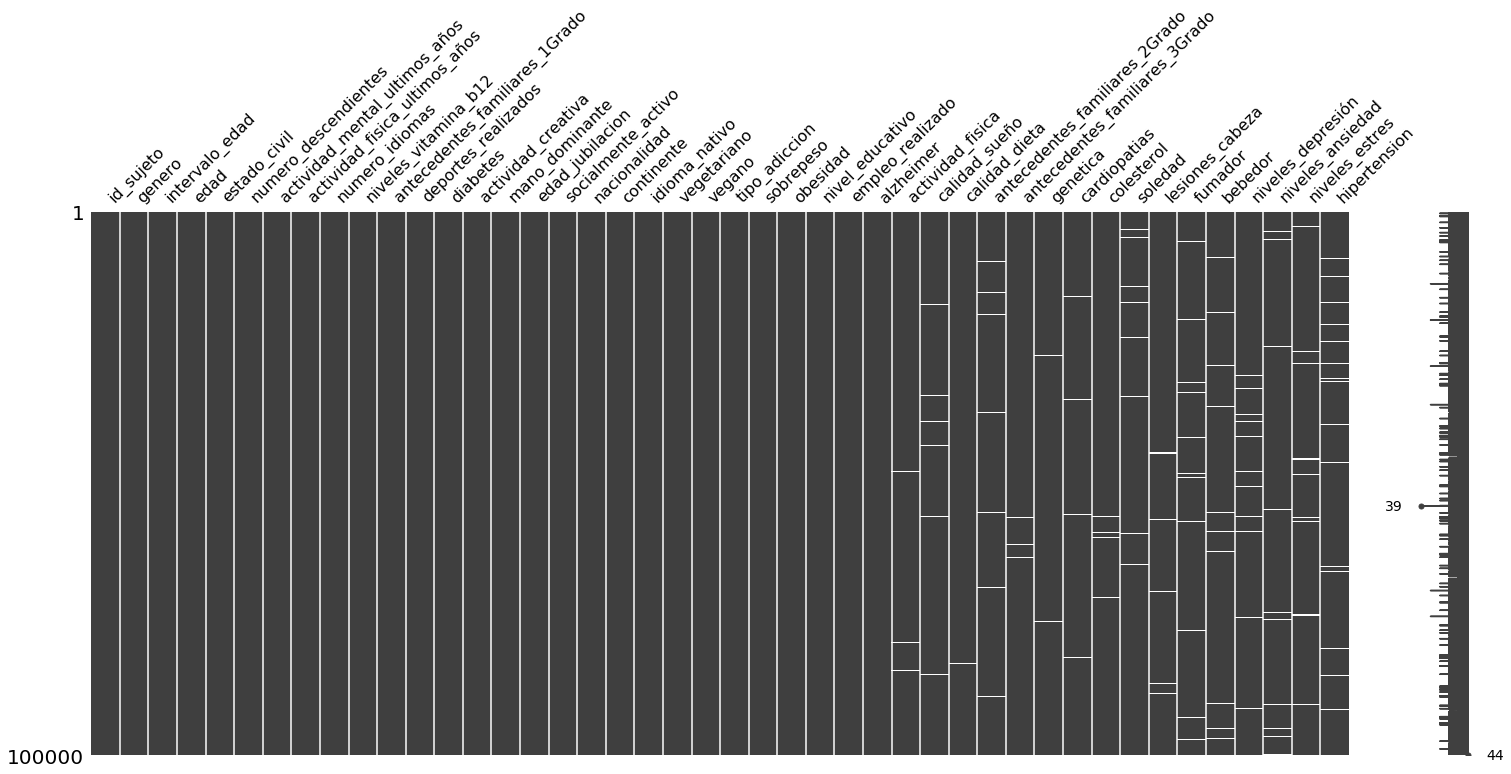

In [158]:
df_null20 = df_union[['actividad_fisica', 'calidad_sueño','calidad_dieta',
       'antecedentes_familiares_2Grado', 'antecedentes_familiares_3Grado',
       'genetica','cardiopatias', 'colesterol','soledad','lesiones_cabeza']]
df_null20 = df_null20.mask(np.random.random(df_null20.shape) < .01)

df_null10 = df_union[['fumador', 'bebedor', 'niveles_depresión',
       'niveles_ansiedad', 'niveles_estres',
       'hipertension']]
df_null10 = df_null10.mask(np.random.random(df_null10.shape) < .02)

df_null = pd.concat([df_null20, df_null10], axis=1)

df_nullFull = df_union[['id_sujeto', 'genero', 'intervalo_edad', 'edad', 'estado_civil',
       'numero_descendientes','actividad_mental_ultimos_años',
       'actividad_fisica_ultimos_años', 'numero_idiomas',
       'niveles_vitamina_b12', 'antecedentes_familiares_1Grado','deportes_realizados','diabetes',
       'actividad_creativa', 'mano_dominante',
       'edad_jubilacion', 'socialmente_activo','nacionalidad', 'continente', 
                      'idioma_nativo', 'vegetariano',
       'vegano','tipo_adiccion', 'sobrepeso', 'obesidad',
       'nivel_educativo', 'empleo_realizado', 'alzheimer']]
df_full_to_anal = pd.concat([df_nullFull, df_null], axis=1)
msno.matrix(df_full_to_anal)

Ahora comenzaremos a imputar más abajo, usaremos el DataSet de df_union como ancla para revisar si los resultados están bien predichos o no.

# 4. Prueba de la aplicación de imputación de valores nulos mediante diversos métodos

A continuación vamos a realizar la imputación de valores nulos para ver que método puede ser el más recomendado para aplicar en datos de medicina. Usaremos la imputación con la media, KNNImputer y Mice(IterativeImputer)

### 4.1. Media

In [118]:
# Creación de un diccionario vacio
ordinal_enc_dict = {}

for col_name in df_full_to_anal:
    # Creación de un codificador
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = df_full_to_anal[col_name]
    
    # Seleccione valores no nulos
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Almacenar los valores
    df_full_to_anal.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [120]:
df_full_to_anal = df_full_to_anal.fillna(df_full_to_anal.mean())

In [122]:
    
# Loop over the column names in users
for col_name in df_full_to_anal:
    
    # Reshape the data
    reshaped = df_full_to_anal[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    df_full_to_anal[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

In [125]:
lista_columnas = ['id_sujeto', 'genero', 'intervalo_edad', 'edad', 'estado_civil',
       'numero_descendientes', 'actividad_mental_ultimos_años',
       'actividad_fisica_ultimos_años', 'numero_idiomas',
       'niveles_vitamina_b12', 'antecedentes_familiares_1Grado',
       'deportes_realizados', 'diabetes', 'actividad_creativa',
       'mano_dominante', 'edad_jubilacion', 'socialmente_activo',
       'nacionalidad', 'continente', 'idioma_nativo', 'vegetariano', 'vegano',
       'tipo_adiccion', 'sobrepeso', 'obesidad', 'nivel_educativo',
       'empleo_realizado', 'alzheimer', 'actividad_fisica', 'calidad_sueño',
       'calidad_dieta', 'antecedentes_familiares_2Grado',
       'antecedentes_familiares_3Grado', 'genetica', 'cardiopatias',
       'colesterol', 'soledad', 'lesiones_cabeza', 'fumador', 'bebedor',
       'niveles_depresión', 'niveles_ansiedad', 'niveles_estres',
       'hipertension']

lista = list(range(0,100000))

In [128]:
nulos = df_full_to_anal.isnull().sum().sum()
nulos

0

In [127]:
bien = 0
mal = 0

for j in lista_columnas:
    for i in lista:
        if df_full_to_anal[j][i] == df_union[j][i]:
            bien = bien + 1
            
        else:
            mal = mal + 1
            #print(df_mean[j][i], "y", df_union[j][i])

print("Resultados incorrectos: " , mal,  "mal, donde la precisión es de: ", 
      round((1-(mal/nulos))*100,2),"%")

Resultados corrects:  4386317  y resultados incorrectos:  13683 mal, donde la precisión es de:  37.65 %


### 4.2. KNN Imputer

Para este método debido a las necesidades de memoria que tiene, haremos la prueba con una muestra del 10% del Dataset. Para poder ejecutar este algoritmo con más registros deberíamos hacerlo en una nube con una capacidad de memoria elevada.

In [131]:
df_full_to_anal = df_full_to_anal[0:10000]
# Creación de un diccionario vacio
ordinal_enc_dict = {}

for col_name in df_full_to_anal:
    # Creación de un codificador
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = df_full_to_anal[col_name]
    
    # Seleccione valores no nulos
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Almacenar los valores
    df_full_to_anal.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [132]:
# KNN imputer
KNN_imputer = KNN(10)

# Imputación DataFrame
df_full_to_anal.iloc[:, :] = np.round(KNN_imputer.fit_transform(df_full_to_anal))

# Loop over the column names in users
for col_name in df_full_to_anal:
    
    # Reshape the data
    reshaped = df_full_to_anal[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    df_full_to_anal[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

Imputing row 1/10000 with 0 missing, elapsed time: 34.384
Imputing row 101/10000 with 0 missing, elapsed time: 34.385
Imputing row 201/10000 with 1 missing, elapsed time: 34.386
Imputing row 301/10000 with 1 missing, elapsed time: 34.387
Imputing row 401/10000 with 1 missing, elapsed time: 34.389
Imputing row 501/10000 with 0 missing, elapsed time: 34.390
Imputing row 601/10000 with 0 missing, elapsed time: 34.392
Imputing row 701/10000 with 0 missing, elapsed time: 34.392
Imputing row 801/10000 with 0 missing, elapsed time: 34.394
Imputing row 901/10000 with 0 missing, elapsed time: 34.395
Imputing row 1001/10000 with 0 missing, elapsed time: 34.396
Imputing row 1101/10000 with 0 missing, elapsed time: 34.397
Imputing row 1201/10000 with 1 missing, elapsed time: 34.399
Imputing row 1301/10000 with 1 missing, elapsed time: 34.400
Imputing row 1401/10000 with 0 missing, elapsed time: 34.401
Imputing row 1501/10000 with 0 missing, elapsed time: 34.403
Imputing row 1601/10000 with 0 missi

In [136]:
nulos = int(df_full_to_anal[0:10000].isnull().sum().sum())
nulos

2241

In [138]:
bien = 0
mal = 0

for j in lista_columnas:
    for i in list(range(0,1000)):
        if df_full_to_anal[0:10000][j][i] == df_union[0:10000][j][i]:
            bien = bien + 1
            #print(df_full_to_anal[j][i], "y", df_alz[0:10000][j][i])
        else:
            mal = mal + 1

print("Resultados incorrectos: " , mal,  "mal, donde la precisión es de: ", 
      round((1-(mal/nulos))*100,2),"%")

Resultados incorrectos:  214 mal, donde la precisión es de:  90.45 %


### 4.3. IterativeImputer

In [159]:
# Creación de un diccionario vacio
ordinal_enc_dict = {}

for col_name in df_full_to_anal:
    # Creación de un codificador
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = df_full_to_anal[col_name]
    
    # Seleccione valores no nulos
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Almacenar los valores
    df_full_to_anal.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [160]:
nulos = df_full_to_anal.isnull().sum().sum()
nulos

21976

In [161]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df_full_to_anal)
df_full_to_anal = pd.DataFrame(imp_mean.transform(df_full_to_anal), columns = lista_columnas)
df_full_to_anal.head()

,id_sujeto,genero,intervalo_edad,edad,estado_civil,numero_descendientes,actividad_mental_ultimos_años,actividad_fisica_ultimos_años,numero_idiomas,niveles_vitamina_b12,...,cardiopatias,colesterol,soledad,lesiones_cabeza,fumador,bebedor,niveles_depresión,niveles_ansiedad,niveles_estres,hipertension
0,318.0,1.0,4.0,29.0,2.0,3.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0.000000,2.0,0.0,1.0,0.0
1,350.0,0.0,3.0,24.0,3.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,5.0,1.000000,0.0,0.0,2.0,1.0
2,225.0,0.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,1.0,4.0,2.000000,3.0,1.0,1.0,0.0
3,34.0,0.0,5.0,36.0,3.0,3.0,0.0,4.0,1.0,2.0,...,1.0,1.0,0.0,0.0,2.0,1.006809,0.0,1.0,2.0,0.0
4,27.0,0.0,4.0,28.0,0.0,0.0,0.0,3.0,0.0,2.0,...,1.0,0.0,1.0,0.0,4.0,1.000000,0.0,2.0,2.0,1.0


In [163]:
# Bucle sobre las columnas
for col_name in df_full_to_anal:
    
    # Reshape
    reshaped = df_full_to_anal[col_name].values.reshape(-1, 1)
    
    # Transformación inversa
    df_full_to_anal[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

In [165]:
bien = 0
mal = 0

for j in lista_columnas:
    for i in lista:
        if df_full_to_anal[j][i] == df_union[j][i]:
            bien = bien + 1
            
        else:
            mal = mal + 1
            #print(df_mean[j][i], "y", df_union[j][i])

print("Resultados incorrectos: " , mal,  "mal, donde la precisión es de: ", 
      round((1-(mal/nulos))*100,2),"%")

Resultados incorrectos:  13629 mal, donde la precisión es de:  37.98 %


### 4.4. Conclusiones

In [170]:
pd.DataFrame(np.array([["Media","KNN","Iterative"],["37,65%","90,45%","37,98%"]]))

,0,1,2
0,Media,KNN,Iterative
1,"37,65%","90,45%","37,98%"


Como vemos el método que mejor ha funcionado es el KNN Imputer. Pero aquí debemos tomar en cuenta que este método ha utilizado un 10% de la muestra.

También es importante tener en cuenta que en el mundo de la medicina un 90,45% de precisión sigue sin ser suficiente. Tener tanto margen de error puede predecir de forma errónea que una persona acabe padeciendo alzhaimer lo cual es muy peligroso. 

Por eso en este proyecto usaremos el DataSet sin los valores nulos imputados, cuando tengamos datos reales deberemos plantearnos si no nos merecerá más la pena eliminar directamente los registros con valores nulos cuando tengamos suficientes datos.

In [26]:
df_union.to_csv(r"C:\Users\danie\Desktop\TFM\dataset_alzheimer_dani.csv")